2D Plotting with Pyplot
===========================

In the previous lesson, we covered plotting 1D data using pyplot. However, in physics we often deal with datasets 
that have more than 1 independent variable. Consider a few examples: 1) the temperature on the surface of stove as a function of position, 2) the height of the ground as a function of latitude and longitude, or 3) the electric potential due to a dipole as a function of x, y and z position.  With the numpy array data type, we have a tool that enables us to work with these 2D or 3D datasets. Our next step is to visualize this data.

For our purposes, we will consider three ways to plot 2D data: Slicing, contour plots, and surface plots.
For the first option, slicing, we've already covered what this means and how to do it in [the numpy section of this 
lesson](https://foundations-of-scientific-computing.readthedocs.io/en/latest/lessons/L8/numpy.html). 
What I mean by this is one of the ways that we can use to visualize 2D (or 3D) data is to take a 1D slice 
of that dataset and plot it on a line. Since we've discussed both of those things already, I won't go into 
any more detail here.

Unlike slicing, which allows us to visualize only part of a 2D dataset, contour and surface plots all us to
visualize all of the 2D data.

Contour Plots
-------------

Making contour plots with Pyplot is nearly as easy as making line plots. The key difference, of course, is that we need some 2D data. Let's create a sample set to use. Let's consider a metal plate that has been heated such
that the surface temperature obeys the following function:
$$T(x,y) = x^2-y^2$$
on a grid from $-2<x<2$ and $-2<y<2$. First, we will import numpy and pyplot so that we have access to the tools needed to create and plot this function. Then we'll create a 100x100 point grid.

In [16]:
import numpy as np
from matplotlib import pyplot as pp

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

Now I have everything that I need to create a temperature variable and populate it. Make sure you understand the above temperature function. For all points on my x and y grid there is a temperature value. In order to populate T, first I need to define a 2D array in which to hold my temperature values. 

In [17]:
temperature = np.zeros((len(y),len(x)))

Note that I put y first instead of x because pyplot will plot the 1st dimension of a 2D array in the vertical direction.

With my array created, I can now loop over both of my x and y grids and solve for T at all grid points.

In [18]:
for i in range(len(x)):
    for j in range(len(y)):
        temperature[j,i] = x[i]**2 - y[j]**2

The temperature assignment line (line 3) can often be a tricky for people to understand because of confusion between grid values (x and y) and index values (i and j). Be sure to review our discussion on [iterables](https://foundations-of-scientific-computing.readthedocs.io/en/latest/lessons/L3/recursion.html#Iterables) if you need a refresher on the difference. In short, the values of x and y represent a particular location on 
our metal plate. i and j are index values (0, 1, 2, ...) that are used to refer to a specific element in each 
array.

<div class="alert alert-info">

**Note**

While the above example works just fine, I want to emphasize that it is inefficient. Numpy arrays are a powerful tool and one of the advantages of using them is they are capable of doing "vector" operations. We can use this to  avoid looping over all grid points which makes it more efficient to write and more efficient for the computer to 
execute.
    
</div>

The default behavior for mathematic operations is to process them element by element. For example, if I have two 1D arrays of the same length and I add them together, the result will be a new 1D array of the same shape as the originals, where each element is the sum of the i$^{th}$ elements of the original arrays. In code:

In [19]:
array1 = np.array([1,3,5])
array2 = np.array([2,4,6])
array3 = array1 + array2
print(array3)

[ 3  7 11]


Sure, I could have done that by creating a loop with 3 iterations, but using vector operations in this way is 
much more efficient for the computer. This works for all numpy arrays, not just 1D ones. So, we can extend that to our temperature example. The only thing is we need to know the values of x and y for all points on the grid. Right now, x and y are each 1D arrays, not 2D like our temperature array. X is something like:
$$x = \begin{bmatrix}
       -2 ,-1.8, -1.6, \cdots,x_n
       \end{bmatrix}$$

So, what we need to have is an 2D array of x values:

$$x = \begin{bmatrix}
       -2 ,-1.8, -1.6, \cdots,x_n \\
     -2 ,-1.8, -1.6, \cdots,x_n \\
     -2 ,-1.8, -1.6, \cdots,x_n \\
    \vdots,\vdots,\vdots,\ddots,\vdots \\
    -2 ,-1.8, -1.6, \cdots,x_n \\
       \end{bmatrix}$$

Where there are m copies of the first row, m being the number of y grid points. Luckily, numpy has a tool for this since it is something that is done frequently:

In [23]:
X,Y = np.meshgrid(x,y)
print(X)

[[-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 ...
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]
 [-2.         -1.95959596 -1.91919192 ...  1.91919192  1.95959596
   2.        ]]


The `meshgrid()` function does exactly what we want it to. It takes two 1D arrays that together specify a 2D grid and return two 2D arrays that specify the x and y grid values at all grid points. With those two arrays (that are the same size) we can now use array math to create our temperature array:

In [25]:
temperatureAlternativeMethod = X**2 - Y**2
print(temperatureAlternativeMethod)

[[ 0.00000000e+00 -1.59983675e-01 -3.16702377e-01 ... -3.16702377e-01
  -1.59983675e-01  0.00000000e+00]
 [ 1.59983675e-01  0.00000000e+00 -1.56718702e-01 ... -1.56718702e-01
   8.88178420e-16  1.59983675e-01]
 [ 3.16702377e-01  1.56718702e-01  0.00000000e+00 ...  1.77635684e-15
   1.56718702e-01  3.16702377e-01]
 ...
 [ 3.16702377e-01  1.56718702e-01 -1.77635684e-15 ...  0.00000000e+00
   1.56718702e-01  3.16702377e-01]
 [ 1.59983675e-01 -8.88178420e-16 -1.56718702e-01 ... -1.56718702e-01
   0.00000000e+00  1.59983675e-01]
 [ 0.00000000e+00 -1.59983675e-01 -3.16702377e-01 ... -3.16702377e-01
  -1.59983675e-01  0.00000000e+00]]


Again, both methods accomplish the same thing. But, if you can it is better to use vector operations.

Anyway, now that we have our 2D data array, we want to plot it using a contour plot. The `contour()` function takes at least 1 argument, the dependent value. Typically though, we would plot the dependent vs. the two independent variables (e.g. T vs. x and y).  So, to specify those,`contour()` will take 3 position arguments (x,y,z):

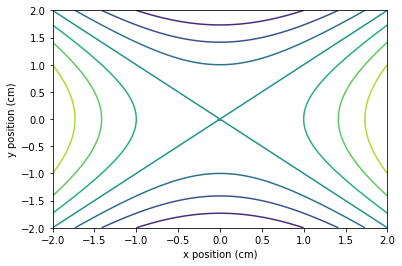

In [28]:
pp.contour(X,Y,temperature)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.show()

The result is a contour plot where each line represents an "isotherm" in this case- a line of constant temperature. You'll note that by default pyplot colors those lines, which is nice, but doesn't tell us what the actual values of each line or each color represent, which is not ideal. To do that, we need to add labels:

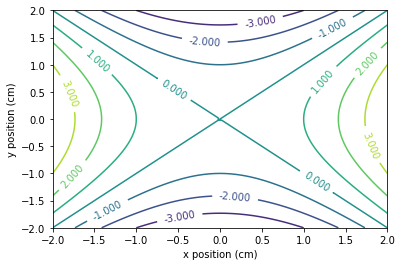

In [31]:
ourplot = pp.contour(X,Y,temperature)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.clabel(ourplot, fontsize=10)
pp.show()

In order to add labels, I need to reference the plot object that was created when I used `contour()`. Thus, I had to store the resulting object in a variable (I chose "ourplot") and use that in the call to the `clabel()` function. 

What if I want "higher resolution" e.g. more, or fewer lines? We can do that by specifying the "levels" in our call to `contour()`:

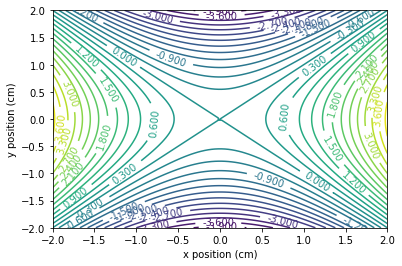

In [32]:
ourplot = pp.contour(X,Y,temperature,levels = 30)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.clabel(ourplot, fontsize=10)
pp.show()

The `levels` keyword must either be a scalar, as above, which will automatically scale the line values, or we can specify the exact lines to plot using an array:

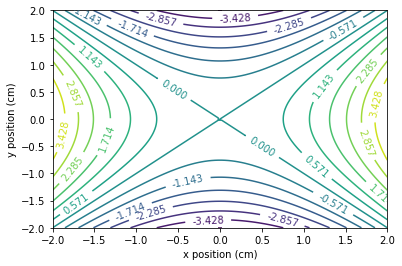

In [35]:
tmin = np.min(temperature)
tmax = np.max(temperature)
mylevels = np.linspace(tmin,tmax,15)
ourplot = pp.contour(X,Y,temperature,levels=mylevels)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.clabel(ourplot, fontsize=10)
pp.show()

An alternative to creating a contour plot using lines like this is to created a filled contour. In this case, the tools above work mostly the same.

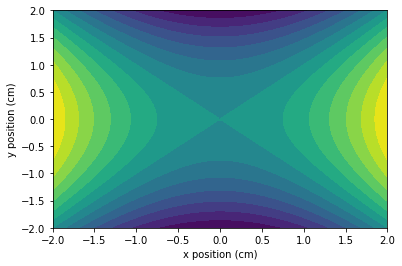

In [38]:
ourplot = pp.contourf(X,Y,temperature,levels=mylevels)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.show()

Again, I can add labels to a contour plot in the same way, though it will be easier to read if I make them black.

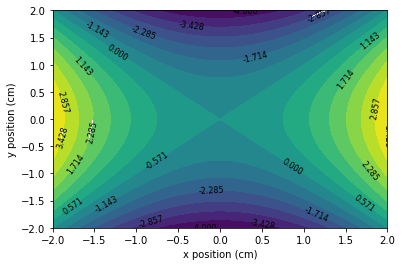

In [50]:
ourplot = pp.contourf(X,Y,temperature,levels=mylevels)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.clabel(ourplot, fontsize=8,colors='k')
pp.show()

I can even couple a filled contour with a lined contour.

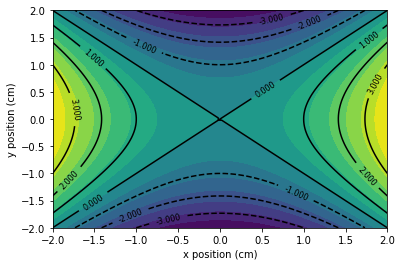

In [52]:
ourplot = pp.contourf(X,Y,temperature,levels=mylevels)
ourlineplot = pp.contour(X,Y,temperature,colors='k')
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.clabel(ourlineplot, fontsize=8,colors='k')
pp.show()

Note that pyplot uses dashed lines by default to indicate negative values. All of this is customizable. Also, here I've chosen to use fewer levels on my line plot than what I used with my filled contour. Ultimately,
if you are going to use a filled contour, with our without lines, you should probably use a color bar. Like with labels, we do this by referencing the contour plot that we created:

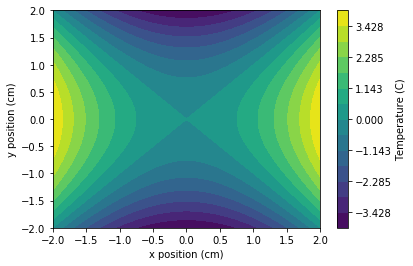

In [54]:
ourplot = pp.contourf(X,Y,temperature,levels=mylevels)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
mycb = pp.colorbar(ourplot,label="Temperature (C)")
pp.show()

If you include a color bar, be sure to include a label! Finally, these colors might not make sense for the data that you are trying to visualize. In this example, since I am showing temperatures, it might make sense to use red for hot and cold for blue. Pyplot has many built in ["colormaps"](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) that make it easy to switch palettes. Let's change ours to "coolwarm":

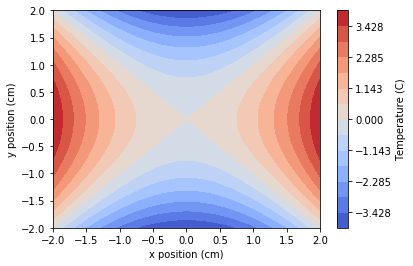

In [55]:
ourplot = pp.contourf(X,Y,temperature,levels=mylevels,cmap="coolwarm")
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
mycb = pp.colorbar(ourplot,label="Temperature (C)")
pp.show()

Surface plots
-------------

Another plot type that can be useful for showing 2D data is a surface plot. A surface plot attempts to show the data by representing the dependent variable using an actual surface whose height relative to the x-y plane corresponds to the value of the dependent variable at a particular location. Because this requires three axes instead of two, creating a surface plot requires a slightly different procedure than line or contour plots. Specifically, we have to tell pyplot that our figure will have 3 axes before we can plot anything. Let's start by working with a different dataset:

In [84]:
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,30)
X,Y = np.meshgrid(x,y)
Z = 1 - X**2 - Y**2

Z is the height of a hemisphere as a function of x and y. To make a surface plot, first we need to create a `figure` object, and then create a 3D `axis` object on the figure. In order to create the 3D axes, I need to import Axes3D. This gives me access to the '3d' projection used by the `gca()` (which stands for "get current axis") function.

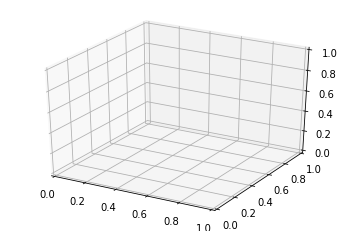

In [91]:
from mpl_toolkits.mplot3d import Axes3D 
fig = pp.figure()
ax = fig.gca(projection='3d')

Now that I have my axis, I can make my surface plot.

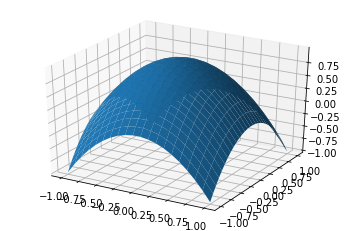

In [86]:
fig = pp.figure()
ax = fig.gca(projection='3d')
mysurf = ax.plot_surface(X,Y,Z)
pp.show()

Here we have a basic surface plot. If we use a colormap, we will be able to emphasize the height of the surface. We can also complete this plot by adding labels and configuring some other options.

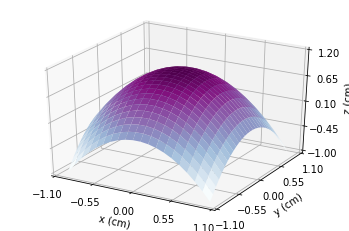

In [90]:
from matplotlib.ticker import LinearLocator
fig = pp.figure()
ax = fig.gca(projection='3d')
mysurf = ax.plot_surface(X,Y,Z,cmap="BuPu")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_zlabel("z (cm)")
ax.set_zlim(-1.0, 1.2)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(5))
pp.show()

The `set_major_locator()` function requires an additional import and is used to reduce the number of major tickmarks used.

If you use `show()` to view this plot, you can rotate it in the GUI and then save it in the perspective that you 
prefer. If you use `savefig()`, this is the default view. However the `ax.view_init()` allows you to specify the 
elevation and azimuthal view angles.

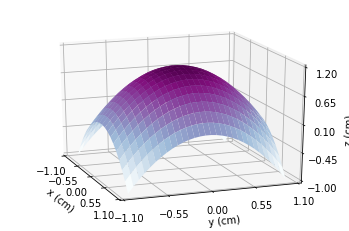

In [95]:
fig = pp.figure()
ax = fig.gca(projection='3d')
ax.view_init(20,-20)
mysurf = ax.plot_surface(X,Y,Z,cmap="BuPu")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_zlabel("z (cm)")
ax.set_zlim(-1.0, 1.2)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(5))
pp.show()